In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('MERGEDDATASETS (1).csv')

In [5]:
df

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,...,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,5008835,-36.0,5.764706,123188,0,Cash loans,F,N,Y,1,...,-1187.0,0.0,7.0,2.0,21.0,3.0,0.0,4.0,4.0,4.0
1,5008884,-20.0,5.756098,249655,0,Cash loans,F,N,Y,0,...,-830.0,0.0,7.0,2.0,26.0,2.0,2.0,5.0,10.0,3.0
2,5008906,-14.0,2.952381,281455,0,Cash loans,F,N,Y,0,...,-597.0,0.0,7.0,2.0,26.0,2.0,2.0,5.0,10.0,1.0
3,5008931,-2.5,5.000000,281455,0,Cash loans,F,N,Y,0,...,-87.0,0.0,7.0,2.0,26.0,2.0,2.0,5.0,10.0,1.0
4,5008932,-2.5,1.166667,281455,0,Cash loans,F,N,Y,0,...,-87.0,0.0,7.0,2.0,26.0,2.0,2.0,5.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10210,6842596,-27.0,4.690909,164770,0,Revolving loans,F,N,Y,0,...,-907.0,0.0,7.0,2.0,18.0,3.0,0.0,4.0,2.0,1.0
10211,6842599,-27.0,4.690909,164770,0,Revolving loans,F,N,Y,0,...,-907.0,0.0,7.0,2.0,18.0,3.0,0.0,4.0,2.0,1.0
10212,6842637,-10.5,5.272727,140890,0,Revolving loans,M,Y,Y,0,...,-391.0,3.0,7.0,1.0,26.0,2.0,2.0,3.0,10.0,3.0
10213,6842784,-10.5,4.909091,204373,0,Revolving loans,F,N,Y,1,...,-366.0,1.0,7.0,2.0,2.0,3.0,0.0,6.0,2.0,1.0


In [8]:
new_df=df[['SK_ID_CURR','TARGET']]

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10215 entries, 0 to 10214
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   SK_ID_CURR  10215 non-null  int64
 1   TARGET      10215 non-null  int64
dtypes: int64(2)
memory usage: 159.7 KB


<Axes: xlabel='SK_ID_CURR', ylabel='TARGET'>

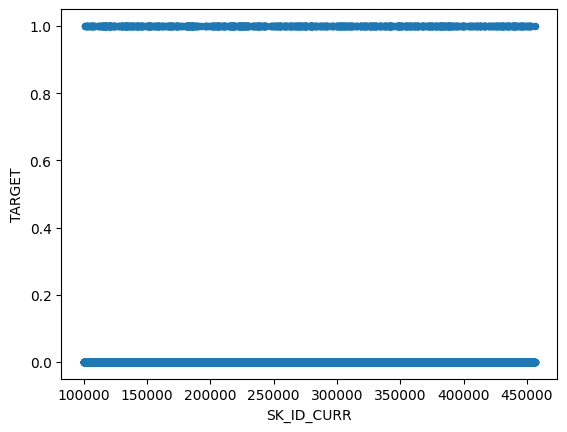

In [10]:
new_df.plot(x='SK_ID_CURR', y='TARGET', kind='scatter')

In [12]:
x = new_df['SK_ID_CURR']
y = new_df['TARGET']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (8172,)
X_test: (2043,)
Y_train: (8172,)
Y_test: (2043,)


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [20]:
# train the model using training data
# since we have only one independent variable, you should use 'values.reshape(-1,1)'. Otherwise, x_train is enough.
model.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [21]:
y_pred = model.predict(x_test.values.reshape(-1,1))

In [23]:
from sklearn.metrics import mean_squared_error


In [24]:
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)

MSE -->  0.07628664692334351


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Predicted')

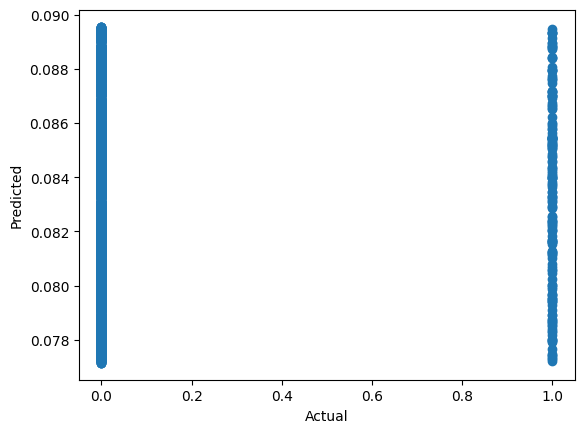

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='SK_ID_CURR', ylabel='TARGET'>

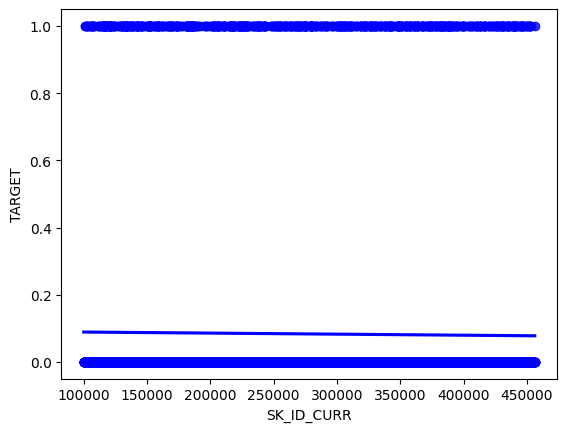

In [27]:
sns.regplot(x=x, y=y, ci=None, color ='blue')

In [28]:
import math
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)

RMSE -->  0.27620037458943375


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)

MAE -->  0.152656384821579


In [33]:
r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

R2 -->  3.3134187039651763e-06


In [34]:
print("MSE --> ", mse)
print("RMSE --> ", rmse)
print("MAE --> ", mae)
print("R2 --> ", r2)

MSE -->  0.07628664692334351
RMSE -->  0.27620037458943375
MAE -->  0.152656384821579
R2 -->  3.3134187039651763e-06


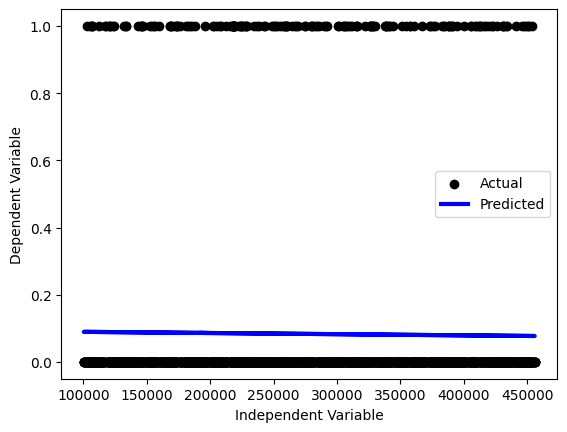

In [36]:
plt.scatter(x_test, y_test, color='black', label='Actual')
plt.plot(x_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()